# Machine Learning Classifiers

Example of several common ML classifiers applied to Fisher's iris data set.

The notebook has been adapted from https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [2]:
%matplotlib inline

import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from corner import corner

mpl.rc('font', size=16)
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', serif='palatino')

## The Iris Dataset

Fisher's iris data come from a paper published in 1936. Four characteristics of irises are identified: sepal width, sepal length, petal width, and petal length. Three species are investigated: I. versicolor, I. virginica, and I. setosa.

The data are available in the scikit learn default datasets. We'll load and plot the data below.

In [6]:
iris_data = datasets.load_iris()
print(iris_data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## Scatter Plots

There are four features in the iris data set:
1. sepal width
2. sepal length
3. petal width
4. petal length

Make scatter plots of the $_{4}C_{2}=6$ combinations of features.

/Users/sybenzvi/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


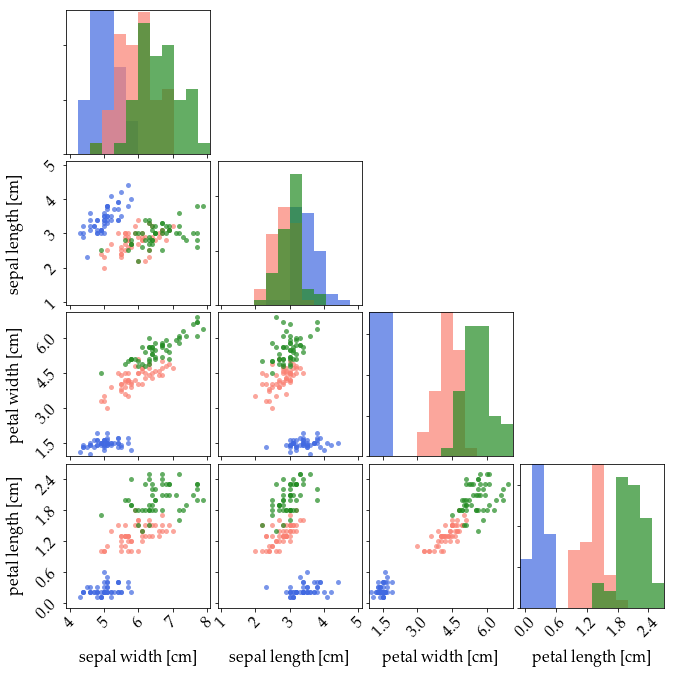

In [7]:
sepwidth, seplength, petwidth, petlength = iris_data.data.T

# fig, axes = plt.subplots(2,2, figsize=(8,8))
fig = corner(iris_data.data[iris_data.target == 0],
             labels=['sepal width [cm]', 'sepal length [cm]', 'petal width [cm]', 'petal length [cm]'],
             range=[(3.9,8.1), (0.9,5.1), (0.9,7.1), (-0.1,2.7)],
             plot_contours=False,
             plot_density=False,
             plot_datapoints=True,
             data_kwargs={'color':'RoyalBlue', 'alpha':0.7, 'markersize':5},
             hist_kwargs={'histtype':'stepfilled', 'color':'RoyalBlue', 'alpha':0.7},
             bins=12)

fig = corner(iris_data.data[iris_data.target == 1],
       range=[(3.9,8.1), (0.9,5.1), (0.9,7.1), (-0.1,2.7)],
       plot_contours=False,
       plot_density=False,
       plot_datapoints=True,
       data_kwargs={'color':'Salmon', 'alpha':0.7, 'markersize':5},
       hist_kwargs={'histtype':'stepfilled', 'color':'Salmon', 'alpha':0.7},
       bins=12,
       fig=fig)

fig = corner(iris_data.data[iris_data.target == 2],
       range=[(3.9,8.1), (0.9,5.1), (0.9,7.1), (-0.1,2.7)],
       plot_contours=False,
       plot_density=False,
       plot_datapoints=True,
       data_kwargs={'color':'ForestGreen', 'alpha':0.7, 'markersize':5},
       hist_kwargs={'histtype':'stepfilled', 'color':'ForestGreen', 'alpha':0.7},
       bins=12,
       fig=fig)

# fig.savefig('fisher_iris.pdf')

## Set up Training and Validation Data Sets

The `model_selection` module in `scikit-learn` has a framework sets up training and validation samples with relatively little work.

For the application programming interface (API) of `model_selection`, we specify two "data sets":
1. $\mathcal{X}$: a table with the four measured features (sepal width/length, petal width/length).
2. $\mathcal{Y}$: a table specifying the target classes.

In [8]:
# X are the data, Y are the target categories (species).
X = iris_data.data
Y = iris_data.target

validation_size = 0.6
seed = 7

X_train, X_validation, Y_train, Y_validation = \
    model_selection.train_test_split(X, Y, 
                                     test_size=validation_size, 
                                     random_state=seed)

## Train the Classification Algorithms

The code below sets up different types of classifiers for the training.

The score (cost/loss function) is tracked according to the accuracy of the classifier, i.e., how many times the feature set $\mathcal{X}$ results in the correct classification $\mathcal{Y}$ for a particular classifier.

In [9]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant', LinearDiscriminantAnalysis()))
models.append(('K Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.933333 (0.110554)
Linear Discriminant: 0.966667 (0.066667)
K Nearest Neighbors: 0.950000 (0.076376)
Decision Tree: 0.966667 (0.066667)
Gaussian Naive Bayes: 0.950000 (0.106719)
Support Vector Machine: 0.966667 (0.066667)


## Validate the Algorithms

Loop through the classifiers, using the training set to "fit" and the validation set to "predict."

This produces a confusion matrix which describes how well the algorithm classified each datum in the validation set.

Logistic Regression
0.9222222222222223
[[30  0  0]
 [ 0 24  5]
 [ 0  2 29]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        30
          1       0.92      0.83      0.87        29
          2       0.85      0.94      0.89        31

avg / total       0.92      0.92      0.92        90

Linear Discriminant
0.9555555555555556
[[30  0  0]
 [ 0 28  1]
 [ 0  3 28]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        30
          1       0.90      0.97      0.93        29
          2       0.97      0.90      0.93        31

avg / total       0.96      0.96      0.96        90

K Nearest Neighbors
0.9111111111111111
[[30  0  0]
 [ 0 24  5]
 [ 0  3 28]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        30
          1       0.89      0.83      0.86        29
          2       0.85      0.90      0.88        31

avg / total       0.91

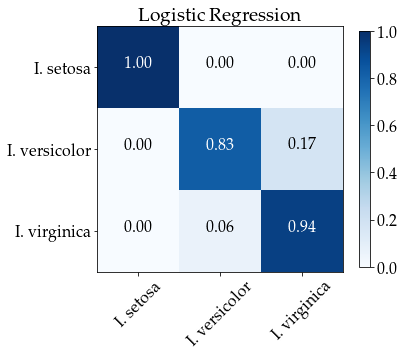

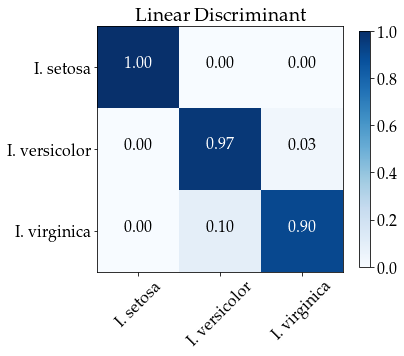

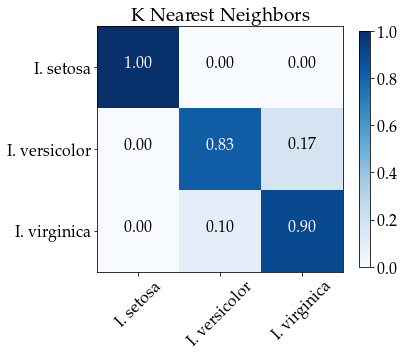

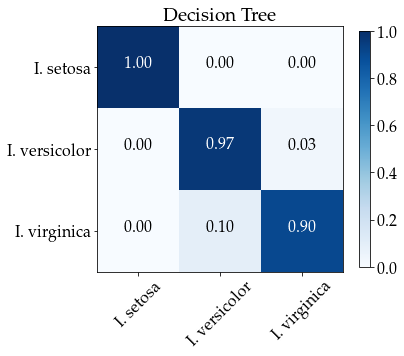

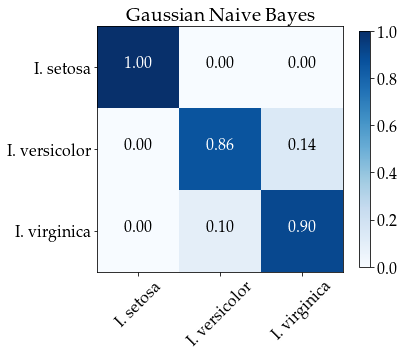

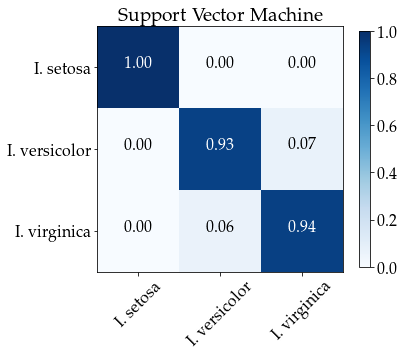

In [10]:
normalize = True

# Make predictions on validation dataset.
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    cm = confusion_matrix(Y_validation, predictions)
    
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(1,1, figsize=(6,6))
    img = ax.imshow(cm,
                    interpolation='nearest',
                    cmap='Blues')

    tick_marks = np.arange(len(iris_data.target_names))
    tick_names = [' '.join(['I.', x]) for x in iris_data.target_names]
    ax.set(#aspect='equal',
           xticks=tick_marks,
           xticklabels=tick_names,
           yticks=tick_marks,
           yticklabels=tick_names,
           title=name)
    fig.colorbar(img, shrink=0.675)
    plt.xticks(rotation=45)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    
    output_name = name.replace(' ', '_')
    outfile = 'iris_{:s}_cmatrix.pdf'.format(output_name)
    fig.savefig(outfile)

## Plot Decision Contours

For each classifier, plot the decision contours used to decide whether or not a data point belongs in one category or another.

In [12]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Gaussian NB Decision Boundary

The Gaussian Naive Bayes Classifier computes the probability $p(x_i|y_k)$ that a measurement with features $x_i$ belongs to a category labeled by $y_k$. E.g.,

- $x_i$ = charge deposited at ground level by an air shower.
- $y_k$ = "signal" ($k=0$) or "background" ($k=1$)

In the case of the iris data, the $y_k$ correspond to the three target classes (types of irises):
1. Setosa
2. Versicolor
3. Virginica

The $x_i$ are the four features we trained on.
1. Sepal width
2. Sepal length
3. Petal width
4. Petal length

The Gaussian NB classifier works by assuming that the $p(x_i|y_k)$ are little 1D Gaussians with widths $\mu_k^i$ and widths $\sigma_k^i$. This is then used to compute the loss function.

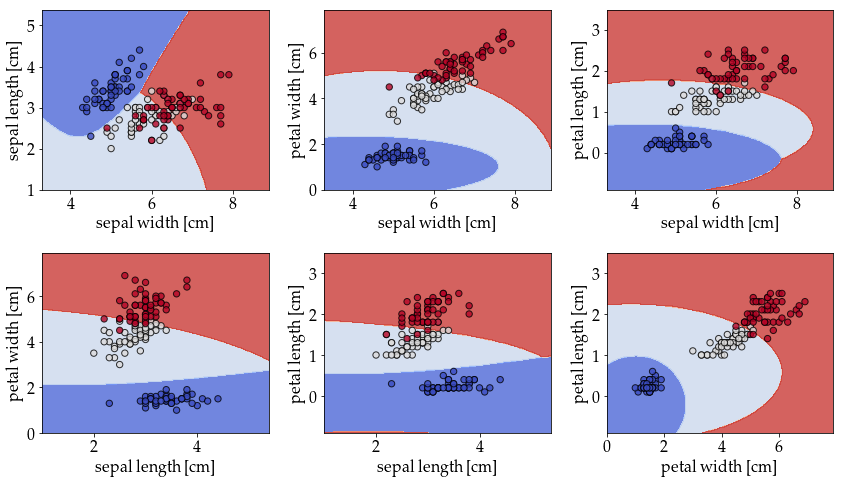

In [13]:
fig, sp = plt.subplots(2,3, figsize=(12,7))
axes = sp.flatten()
labels=['sepal width [cm]', 'sepal length [cm]', 'petal width [cm]', 'petal length [cm]']

k = 0
for i in range(3):
    for j in range(i+1,4):
        X_iris = iris_data.data[:, [i,j]]
        y_iris = iris_data.target
                
        model = GaussianNB()
        model.fit(X_iris, y_iris)

        X0, X1 = X_iris[:, 0], X_iris[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        ax = axes[k]
        plot_contours(ax, model, xx, yy, cmap='coolwarm', alpha=0.8)
        ax.scatter(X0, X1, c=y_iris, cmap='coolwarm', s=40, edgecolors='k', alpha=0.8)
        ax.set(xlabel=labels[i], ylabel=labels[j])
        k += 1
        
fig.tight_layout()
fig.savefig('iris_decision_GaussianNB.pdf')

## LDA Decision Boundary

Linear discriminant analysis assumes that instead of little independent 1D Gaussians, the probability of feature $x$ coming from category $y_k$ is given by a multidimensional Gaussian with nonzero *covariance*.

$p_k(\vec{x}) = \frac{1}{|\Sigma_k|^{1/2}(2\pi)^{D/2}} \exp{-\frac{1}{2}(\vec{x}-\vec{\mu}_k)^\intercal \Sigma_k^{-1} (\vec{x}-\vec{\mu}_k)}$

However, the algorithm assumes every measurement has the same covariance.

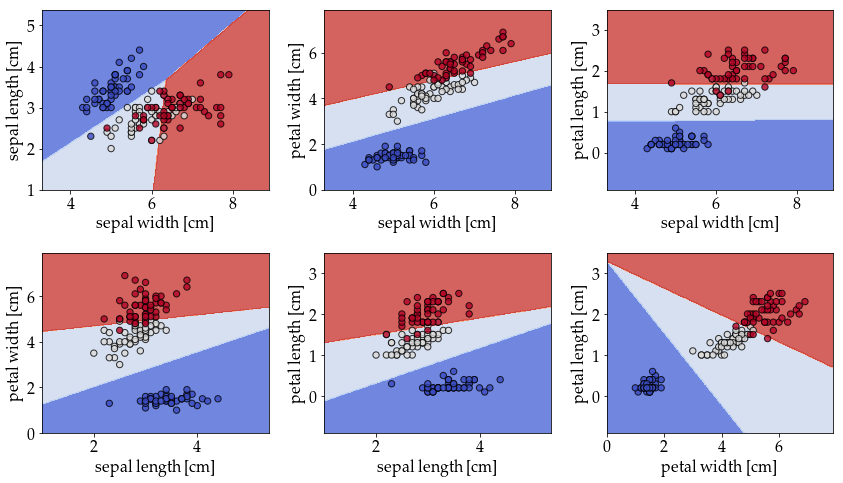

In [169]:
fig, sp = plt.subplots(2,3, figsize=(12,7))
axes = sp.flatten()
labels=['sepal width [cm]', 'sepal length [cm]', 'petal width [cm]', 'petal length [cm]']

k = 0
for i in range(3):
    for j in range(i+1,4):
        X_iris = iris_data.data[:, [i,j]]
        y_iris = iris_data.target
                
        model = LinearDiscriminantAnalysis()
        model.fit(X_iris, y_iris)

        X0, X1 = X_iris[:, 0], X_iris[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        ax = axes[k]
        plot_contours(ax, model, xx, yy, cmap='coolwarm', alpha=0.8)
        ax.scatter(X0, X1, c=y_iris, cmap='coolwarm', s=40, edgecolors='k', alpha=0.8)
        ax.set(xlabel=labels[i], ylabel=labels[j])
        k += 1
        
fig.tight_layout()
fig.savefig('iris_decision_LDA.pdf')

## K-Nearest-Neighbor Decision Boundary

In the $k$-NN approach, the class/category of a given data point is affected by its neighbors in the multidimensional feature space. I.e., if all of the points in the neighborhood of a measurement belong to some class, the measurement is also likely to belong to that class.

Note how the decision boundaries are a lot more affected by the fluctuations in the data set compared to the previous algorithms used.

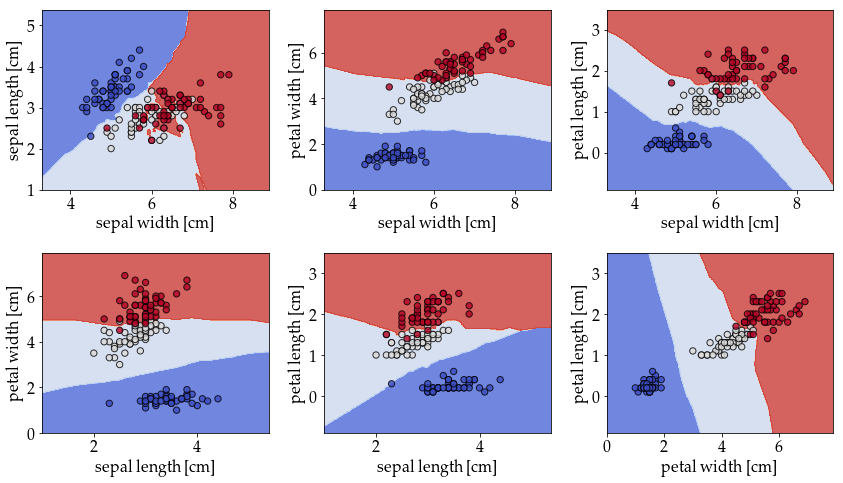

In [171]:
fig, sp = plt.subplots(2,3, figsize=(12,7))
axes = sp.flatten()
labels=['sepal width [cm]', 'sepal length [cm]', 'petal width [cm]', 'petal length [cm]']

k = 0
for i in range(3):
    for j in range(i+1,4):
        X_iris = iris_data.data[:, [i,j]]
        y_iris = iris_data.target
                
        model = KNeighborsClassifier()
        model.fit(X_iris, y_iris)

        X0, X1 = X_iris[:, 0], X_iris[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        ax = axes[k]
        plot_contours(ax, model, xx, yy, cmap='coolwarm', alpha=0.8)
        ax.scatter(X0, X1, c=y_iris, cmap='coolwarm', s=40, edgecolors='k', alpha=0.8)
        ax.set(xlabel=labels[i], ylabel=labels[j])
        k += 1
        
fig.tight_layout()
fig.savefig('iris_decision_KNN.pdf')

## Logistic Regression

In logistic regression, we use class/category probabilities that look like

$p(y=1|x) = \frac{\exp{\sum_j \theta_j x^j}}{1+\exp{\sum_j \theta_j x^j}}
      = p(\vec{\theta})$
      
It gets its name from the logistic function $e^x / (1 + e^x)$.

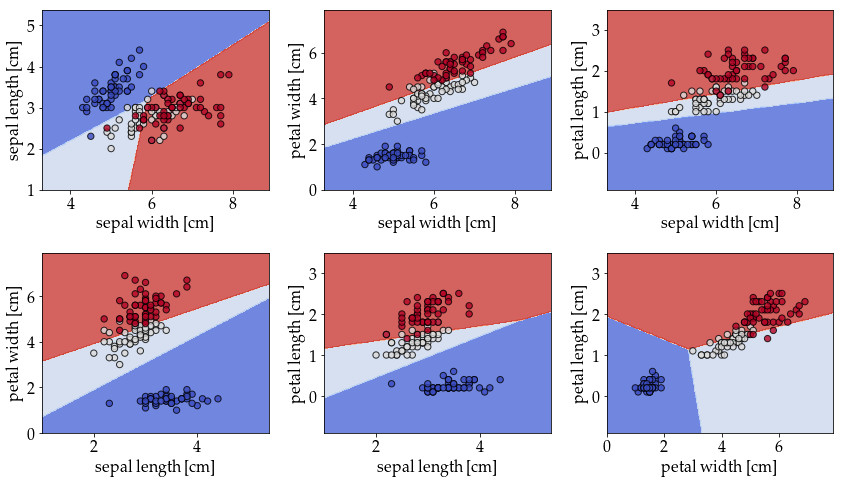

In [14]:
fig, sp = plt.subplots(2,3, figsize=(12,7))
axes = sp.flatten()
labels=['sepal width [cm]', 'sepal length [cm]', 'petal width [cm]', 'petal length [cm]']

k = 0
for i in range(3):
    for j in range(i+1,4):
        X_iris = iris_data.data[:, [i,j]]
        y_iris = iris_data.target
                
        model = LogisticRegression()
        model.fit(X_iris, y_iris)

        X0, X1 = X_iris[:, 0], X_iris[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        ax = axes[k]
        plot_contours(ax, model, xx, yy, cmap='coolwarm', alpha=0.8)
        ax.scatter(X0, X1, c=y_iris, cmap='coolwarm', s=40, edgecolors='k', alpha=0.8)
        ax.set(xlabel=labels[i], ylabel=labels[j])
        k += 1
        
fig.tight_layout()
fig.savefig('iris_decision_LR.pdf')

## Support Vector Machine

A variant of linear decision boundaries are called support vector machines.

The idea here is to define the "hyperplane" that maximizes the distance between the closest points in two classes/categories in some high-dimensional feature space. The distance between them is called the margin, and points on the margin are called *support vectors*.

Essentially, the support vector machine (SVM) tries to minimize the inner product between these hyperplanes.

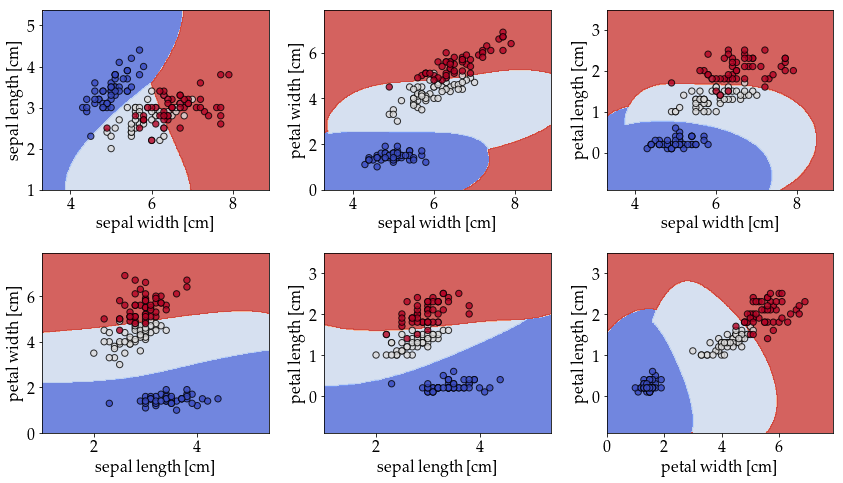

In [175]:
fig, sp = plt.subplots(2,3, figsize=(12,7))
axes = sp.flatten()
labels=['sepal width [cm]', 'sepal length [cm]', 'petal width [cm]', 'petal length [cm]']

k = 0
for i in range(3):
    for j in range(i+1,4):
        X_iris = iris_data.data[:, [i,j]]
        y_iris = iris_data.target
                
        model = SVC()
        model.fit(X_iris, y_iris)

        X0, X1 = X_iris[:, 0], X_iris[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        ax = axes[k]
        plot_contours(ax, model, xx, yy, cmap='coolwarm', alpha=0.8)
        ax.scatter(X0, X1, c=y_iris, cmap='coolwarm', s=40, edgecolors='k', alpha=0.8)
        ax.set(xlabel=labels[i], ylabel=labels[j])
        k += 1
        
fig.tight_layout()
fig.savefig('iris_decision_SVM.pdf')

## Decision Trees

Decision trees provide a hierarchical approach to data classification. The concept works as follows:

1. The top node of the tree contains the entire data set.
2. At each branch of the tree, the data are subdivided into two subsets based on a predefined decision boundary.
3. The boundaries are aligned (somehow) with the feature sets of the data.
4. The tree splitting continues recursively until a stopping criterion is reached.

The depth of the tree can result in overfits or underfits to the data. This can be optimized using *cross validation*.

The advantage of decision trees over other methods is that they're very easy to visualize.

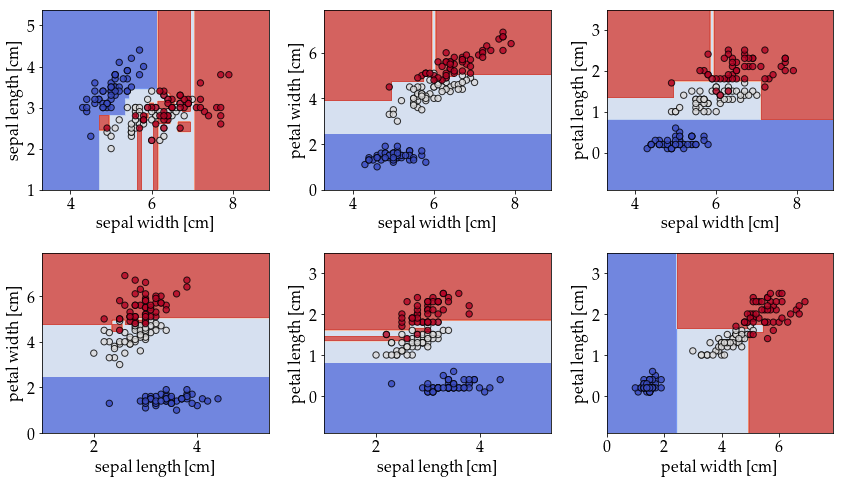

In [15]:
fig, sp = plt.subplots(2,3, figsize=(12,7))
axes = sp.flatten()
labels=['sepal width [cm]', 'sepal length [cm]', 'petal width [cm]', 'petal length [cm]']

k = 0
for i in range(3):
    for j in range(i+1,4):
        X_iris = iris_data.data[:, [i,j]]
        y_iris = iris_data.target
                
        model = DecisionTreeClassifier()
        model.fit(X_iris, y_iris)

        X0, X1 = X_iris[:, 0], X_iris[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        ax = axes[k]
        plot_contours(ax, model, xx, yy, cmap='coolwarm', alpha=0.8)
        ax.scatter(X0, X1, c=y_iris, cmap='coolwarm', s=40, edgecolors='k', alpha=0.8)
        ax.set(xlabel=labels[i], ylabel=labels[j])
        k += 1
        
fig.tight_layout()
fig.savefig('iris_decision_DT.pdf')

### Decision Tree for Iris Data Set

This will produce a nice image of how the decision tree looks.

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=iris_data.feature_names[2:],
                class_names=iris_data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())
graph.write_pdf('dtree.pdf')

True

## Random Forest

Decision trees have the systematic problem that they tend to overfit the training sets.

*Random forests* attempt to solve this problem by averaging over many randomly sampled decision trees. This tends to smooth out the decision boundaries and make them less prone to fluctuations.

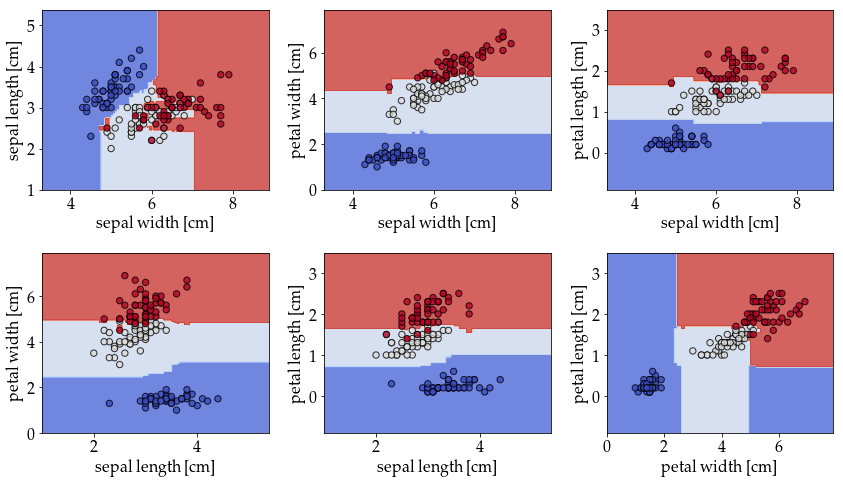

In [17]:
fig, sp = plt.subplots(2,3, figsize=(12,7))
axes = sp.flatten()
labels=['sepal width [cm]', 'sepal length [cm]', 'petal width [cm]', 'petal length [cm]']

k = 0
for i in range(3):
    for j in range(i+1,4):
        X_iris = iris_data.data[:, [i,j]]
        y_iris = iris_data.target
                
        model = RandomForestClassifier(300)
        model.fit(X_iris, y_iris)

        X0, X1 = X_iris[:, 0], X_iris[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        ax = axes[k]
        plot_contours(ax, model, xx, yy, cmap='coolwarm', alpha=0.8)
        ax.scatter(X0, X1, c=y_iris, cmap='coolwarm', s=40, edgecolors='k', alpha=0.8)
        ax.set(xlabel=labels[i], ylabel=labels[j])
        k += 1
        
fig.tight_layout()
fig.savefig('iris_decision_RandomForest.pdf')

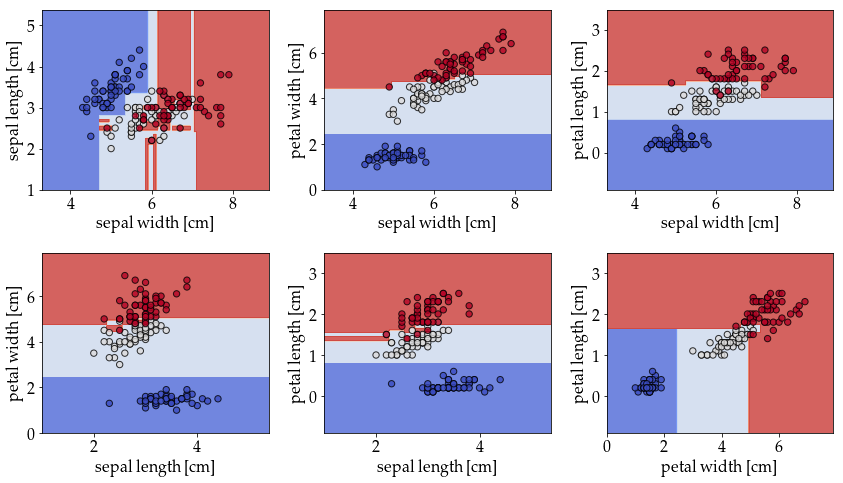

In [18]:
fig, sp = plt.subplots(2,3, figsize=(12,7))
axes = sp.flatten()
labels=['sepal width [cm]', 'sepal length [cm]', 'petal width [cm]', 'petal length [cm]']

k = 0
for i in range(3):
    for j in range(i+1,4):
        X_iris = iris_data.data[:, [i,j]]
        y_iris = iris_data.target
                
        model = GradientBoostingClassifier()
        model.fit(X_iris, y_iris)

        X0, X1 = X_iris[:, 0], X_iris[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        ax = axes[k]
        plot_contours(ax, model, xx, yy, cmap='coolwarm', alpha=0.8)
        ax.scatter(X0, X1, c=y_iris, cmap='coolwarm', s=40, edgecolors='k', alpha=0.8)
        ax.set(xlabel=labels[i], ylabel=labels[j])
        k += 1
        
fig.tight_layout()
fig.savefig('iris_decision_RandomForest.pdf')